# Getting laptops' urls from amazon.com

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import csv
  
def get_data(url):
    HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

    r = requests.get(url, headers = HEADERS, timeout=2.50)
    content = r.content
    soup = BeautifulSoup(content)
   
    return soup

def laptop_urls(page):
    brands={"Apple","Lenovo","Dell", "HP"}
    urls = set()
    for brand in brands:
        url = 'https://www.amazon.com/s?k=' + brand + '&i=computers&rh=n%3A565108&page='+ str(page) + '&qid=1615982138&ref=sr_pg_' + str(page)
        soup = get_data(url)
        l= soup.find_all("a", class_="a-link-normal a-text-normal")
        for link in l:
            urls.add("https://www.amazon.com" + link.get('href'))
    return urls




# Writing dirty data in csv file 

In [11]:
def csv_file_writing():
    with open('laptop_file.csv','w',encoding="utf-8", newline='') as csv_file:
        urls = laptop_urls(1)
        writer = csv.writer(csv_file, delimiter=',', quoting=csv.QUOTE_ALL)
        writer.writerow(['Title', 'URL', 'RAM', 'Storage', 'Price', 'Rating', 'Reviews'])
        
        for url in urls:
            soup = get_data(url)
            
            #Title
            Title = soup.find(id="productTitle")
            if Title is not None:
                Title = Title.get_text().strip()
            else:
                Title = ""
            
            #URL
            URL = url
            if URL is None:
                URL= ""
            
            #RAM
            RAM = ""

            #Storage
            Storage = soup.find("span" ,class_="a-size-base-plus")
            if Storage:
                Storage = Storage.get_text(strip=True)
            else:
                Storage = ""
            
            #Price
            Price = soup.find(id="price_inside_buybox")
            if Price:
                Price = Price.get_text(strip=True)
            else:
                Price = soup.find("span",class_="a-size-large a-color-price")
                if Price:
                    Price = Price.get_text(strip=True)
                else:
                    Price = ""
                
            #Rating
            Rating = soup.find(id="acrCustomerReviewText",class_="a-size-base")
            if Rating: 
                Rating = Rating.get_text(strip=True)
            else:
                Rating = ""
           
            #Reviews
            Reviews = soup.find("span", class_="a-size-medium a-color-base")
            if Reviews:
                Reviews = Reviews.get_text(strip=True)
            else:
                Reviews = ""

            writer.writerow([Title, URL, RAM, Storage, Price, Rating, Reviews + ' \n'])

def csv_file_reading():
    with open('laptop_file.csv','r',encoding="utf-8", newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_ALL)
        for row in reader:
            print(', '.join(row))

csv_file_writing()
csv_file_reading()


Title, URL, RAM, Storage, Price, Rating, Reviews
Dell Latitude 3500 Business Laptop, 15.6" HD, 10th Gen Intel Quad Core i5-10210U, 16GB DDR4 RAM, 256GB NVMe M.2 SSD, Windows 10 Pro, WiFi, Bluetooth, Webcam, USB-C, HDMI, VGA,, https://www.amazon.com/Dell-Latitude-Business-i5-10210U-Bluetooth/dp/B08F3XD6FS/ref=sr_1_23?dchild=1&keywords=Dell&qid=1616248536&s=pc&sr=1-23, , , $1,049.00, 16 ratings, 4.1 out of 5 

Laptop HP X360 14a Chromebook 14" HD Touchscreen, Entertaining from Any Angle Intel Celeron, 4GB DDR4 64GB eMMC WiFi Webcam Stereo Speakers Bluetooth 4.2 Chrome Blue Metallic Color, https://www.amazon.com/HP-Chromebook-Touchscreen-Entertaining-Bluetooth/dp/B08NHVXHJW/ref=sr_1_22?dchild=1&keywords=HP&qid=1616248538&s=pc&sr=1-22, , , $345.90, 50 ratings, 4.6 out of 5 

Apple MacBook Pro 13" with Touch Bar, 10th-Generation Quad-Core Intel Core i7 2.3GHz, 16GB RAM, 512GB SSD, Space Gray (Mid 2020), https://www.amazon.com/Apple-MacBook-Pro-10th-Generation-Quad-Core/dp/B08DTPQ9XB/ref=sr_

# Loading data into Pandas

In [224]:
df = pd.read_csv('laptop_file.csv')
print(df.head())

                                               Title  \
0  Dell Latitude 3500 Business Laptop, 15.6" HD, ...   
1  Laptop HP X360 14a Chromebook 14" HD Touchscre...   
2  Apple MacBook Pro 13" with Touch Bar, 10th-Gen...   
3  Apple MacBook Pro 16-in 2.4GHz 8-core i9 32GB ...   
4  Apple MacBook Pro 13" with Touch Bar, 10th-Gen...   

                                                 URL  RAM Storage      Price  \
0  https://www.amazon.com/Dell-Latitude-Business-...  NaN     NaN  $1,049.00   
1  https://www.amazon.com/HP-Chromebook-Touchscre...  NaN     NaN    $345.90   
2  https://www.amazon.com/Apple-MacBook-Pro-10th-...  NaN     NaN  $1,999.00   
3  https://www.amazon.com/Apple-16-MacBook-Pro-Z0...  NaN     NaN  $3,269.00   
4  https://www.amazon.com/Apple-MacBook-Pro-10th-...  NaN     NaN  $2,599.00   

       Rating          Reviews  
0  16 ratings  4.1 out of 5 \n  
1  50 ratings  4.6 out of 5 \n  
2   8 ratings  4.8 out of 5 \n  
3  52 ratings  4.7 out of 5 \n  
4   6 ratings    

# Data Cleaning

In [225]:
r = df['Rating']
df['Rating'] = r.str.replace('ratings' , '')
df['Rating'] = r.str.replace('rating', '')
r = df['Reviews']
df['Reviews'] = r.str.replace('out of 5 \n' , '')
df['Reviews'] = r.str.replace(' \n' , '')

print(df)

                                                Title  \
0   Dell Latitude 3500 Business Laptop, 15.6" HD, ...   
1   Laptop HP X360 14a Chromebook 14" HD Touchscre...   
2   Apple MacBook Pro 13" with Touch Bar, 10th-Gen...   
3   Apple MacBook Pro 16-in 2.4GHz 8-core i9 32GB ...   
4   Apple MacBook Pro 13" with Touch Bar, 10th-Gen...   
..                                                ...   
93  Apple MacBook Pro 16" with Touch Bar, 9th-Gen ...   
94  2020 Apple MacBook Air with Apple M1 Chip (13-...   
95  Apple MacBook Pro 13" with Touch Bar, 10th-Gen...   
96  Apple MacBook Pro 16-in 2.3GHz 8-core i9 32GB ...   
97  2021 Newest Dell Inspiron 14 5000 Series 5402 ...   

                                                  URL  RAM Storage      Price  \
0   https://www.amazon.com/Dell-Latitude-Business-...  NaN     NaN  $1,049.00   
1   https://www.amazon.com/HP-Chromebook-Touchscre...  NaN     NaN    $345.90   
2   https://www.amazon.com/Apple-MacBook-Pro-10th-...  NaN     NaN  $1,9

In [227]:
for ind in df.index:
    price = df.loc[ind,'Price']
    if type(price) is str:
        i = price.find(".")
        price = price[1:i]
        price = price.replace(",",".")
        if price == "":
            df.loc[ind,'Price'] = 0
        else:
            df.loc[ind,'Price'] = float(price)
    
    if df.loc[ind,'Reviews'] == "":
        df.loc[ind,'Reviews'] = 0
    else:
        df.loc[ind,'Reviews'] = float(df.loc[ind,'Reviews'])
        
    
    if "RAM" in df.loc[ind,'Title']:
        title = df.loc[ind,'Title']
        j = title.find("RAM")
        i = title.rfind(",", 0, j)
        df.loc[ind,'RAM'] = title[i+1:j].strip()

    if "Storage" in df.loc[ind,'Title']:
        title = df.loc[ind,'Title']
        j = title.find("Storage")
        i = title.rfind(",", 0, j)
        df.loc[ind,"Storage"] = title[i+1:j].strip()
        
    if "," in df.loc[ind,'Title']:
        title = df.loc[ind,'Title']
        i = title.find(",")
        df.loc[ind,'Title'] = title[0:i].strip()

    if "-" in df.loc[ind,'Title']:
        title = df.loc[ind,'Title']
        i = title.find("-")
        df.loc[ind,'Title'] = title[0:i].strip()

    if "(" in df.loc[ind,'Title']:
        title = df.loc[ind,'Title']
        i = title.find("(")
        df.loc[ind,'Title'] = title[0:i].strip()
df.head(99)



,Title,URL,RAM,Storage,Price,Rating,Reviews
0,Dell Latitude 3500 Business Laptop,https://www.amazon.com/Dell-Latitude-Business-...,16GB DDR4,NaN,1.049,16,4.1
1,"Laptop HP X360 14a Chromebook 14"" HD Touchscreen",https://www.amazon.com/HP-Chromebook-Touchscre...,NaN,NaN,345,50,4.6
2,"Apple MacBook Pro 13"" with Touch Bar",https://www.amazon.com/Apple-MacBook-Pro-10th-...,16GB,NaN,1.999,8,4.8
3,Apple MacBook Pro 16,https://www.amazon.com/Apple-16-MacBook-Pro-Z0...,NaN,NaN,3.269,52,4.7
4,"Apple MacBook Pro 13"" with Touch Bar",https://www.amazon.com/Apple-MacBook-Pro-10th-...,32GB,NaN,2.599,6,5
...,...,...,...,...,...,...,...
93,"Apple MacBook Pro 16"" with Touch Bar",https://www.amazon.com/Apple-16-MacBook-Pro-Z0...,32GB,NaN,3.299,1,4
94,2020 Apple MacBook Air with Apple M1 Chip,https://www.amazon.com/Apple-MacBook-13-inch-5...,8GB,512GB SSD,1.169,"2,975",4.8
95,"Apple MacBook Pro 13"" with Touch Bar",https://www.amazon.com/Apple-MacBook-Pro-10th-...,32GB,NaN,NaN,NaN,0
96,Apple MacBook Pro 16,https://www.amazon.com/Apple-16-MacBook-Pro-Z0...,NaN,NaN,2.939,26,4.8


# Missing Data Percentage List

In [228]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


Title - 0%
URL - 0%
RAM - 33%
Storage - 88%
Price - 47%
Rating - 4%
Reviews - 0%


# Solution for missing data

In [229]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if round(pct_missing*100) > 50:
        del df[col]

df = df.dropna(subset = ['Price'])

for ind in df.index:
    if df['Price'][ind] == "-":
        df = df.drop(ind)
df = df.dropna(subset = ["Rating"])
df = df.dropna(subset = ["Reviews"])
df = df.reset_index(drop=True)



# Barplot  Price VS Rating

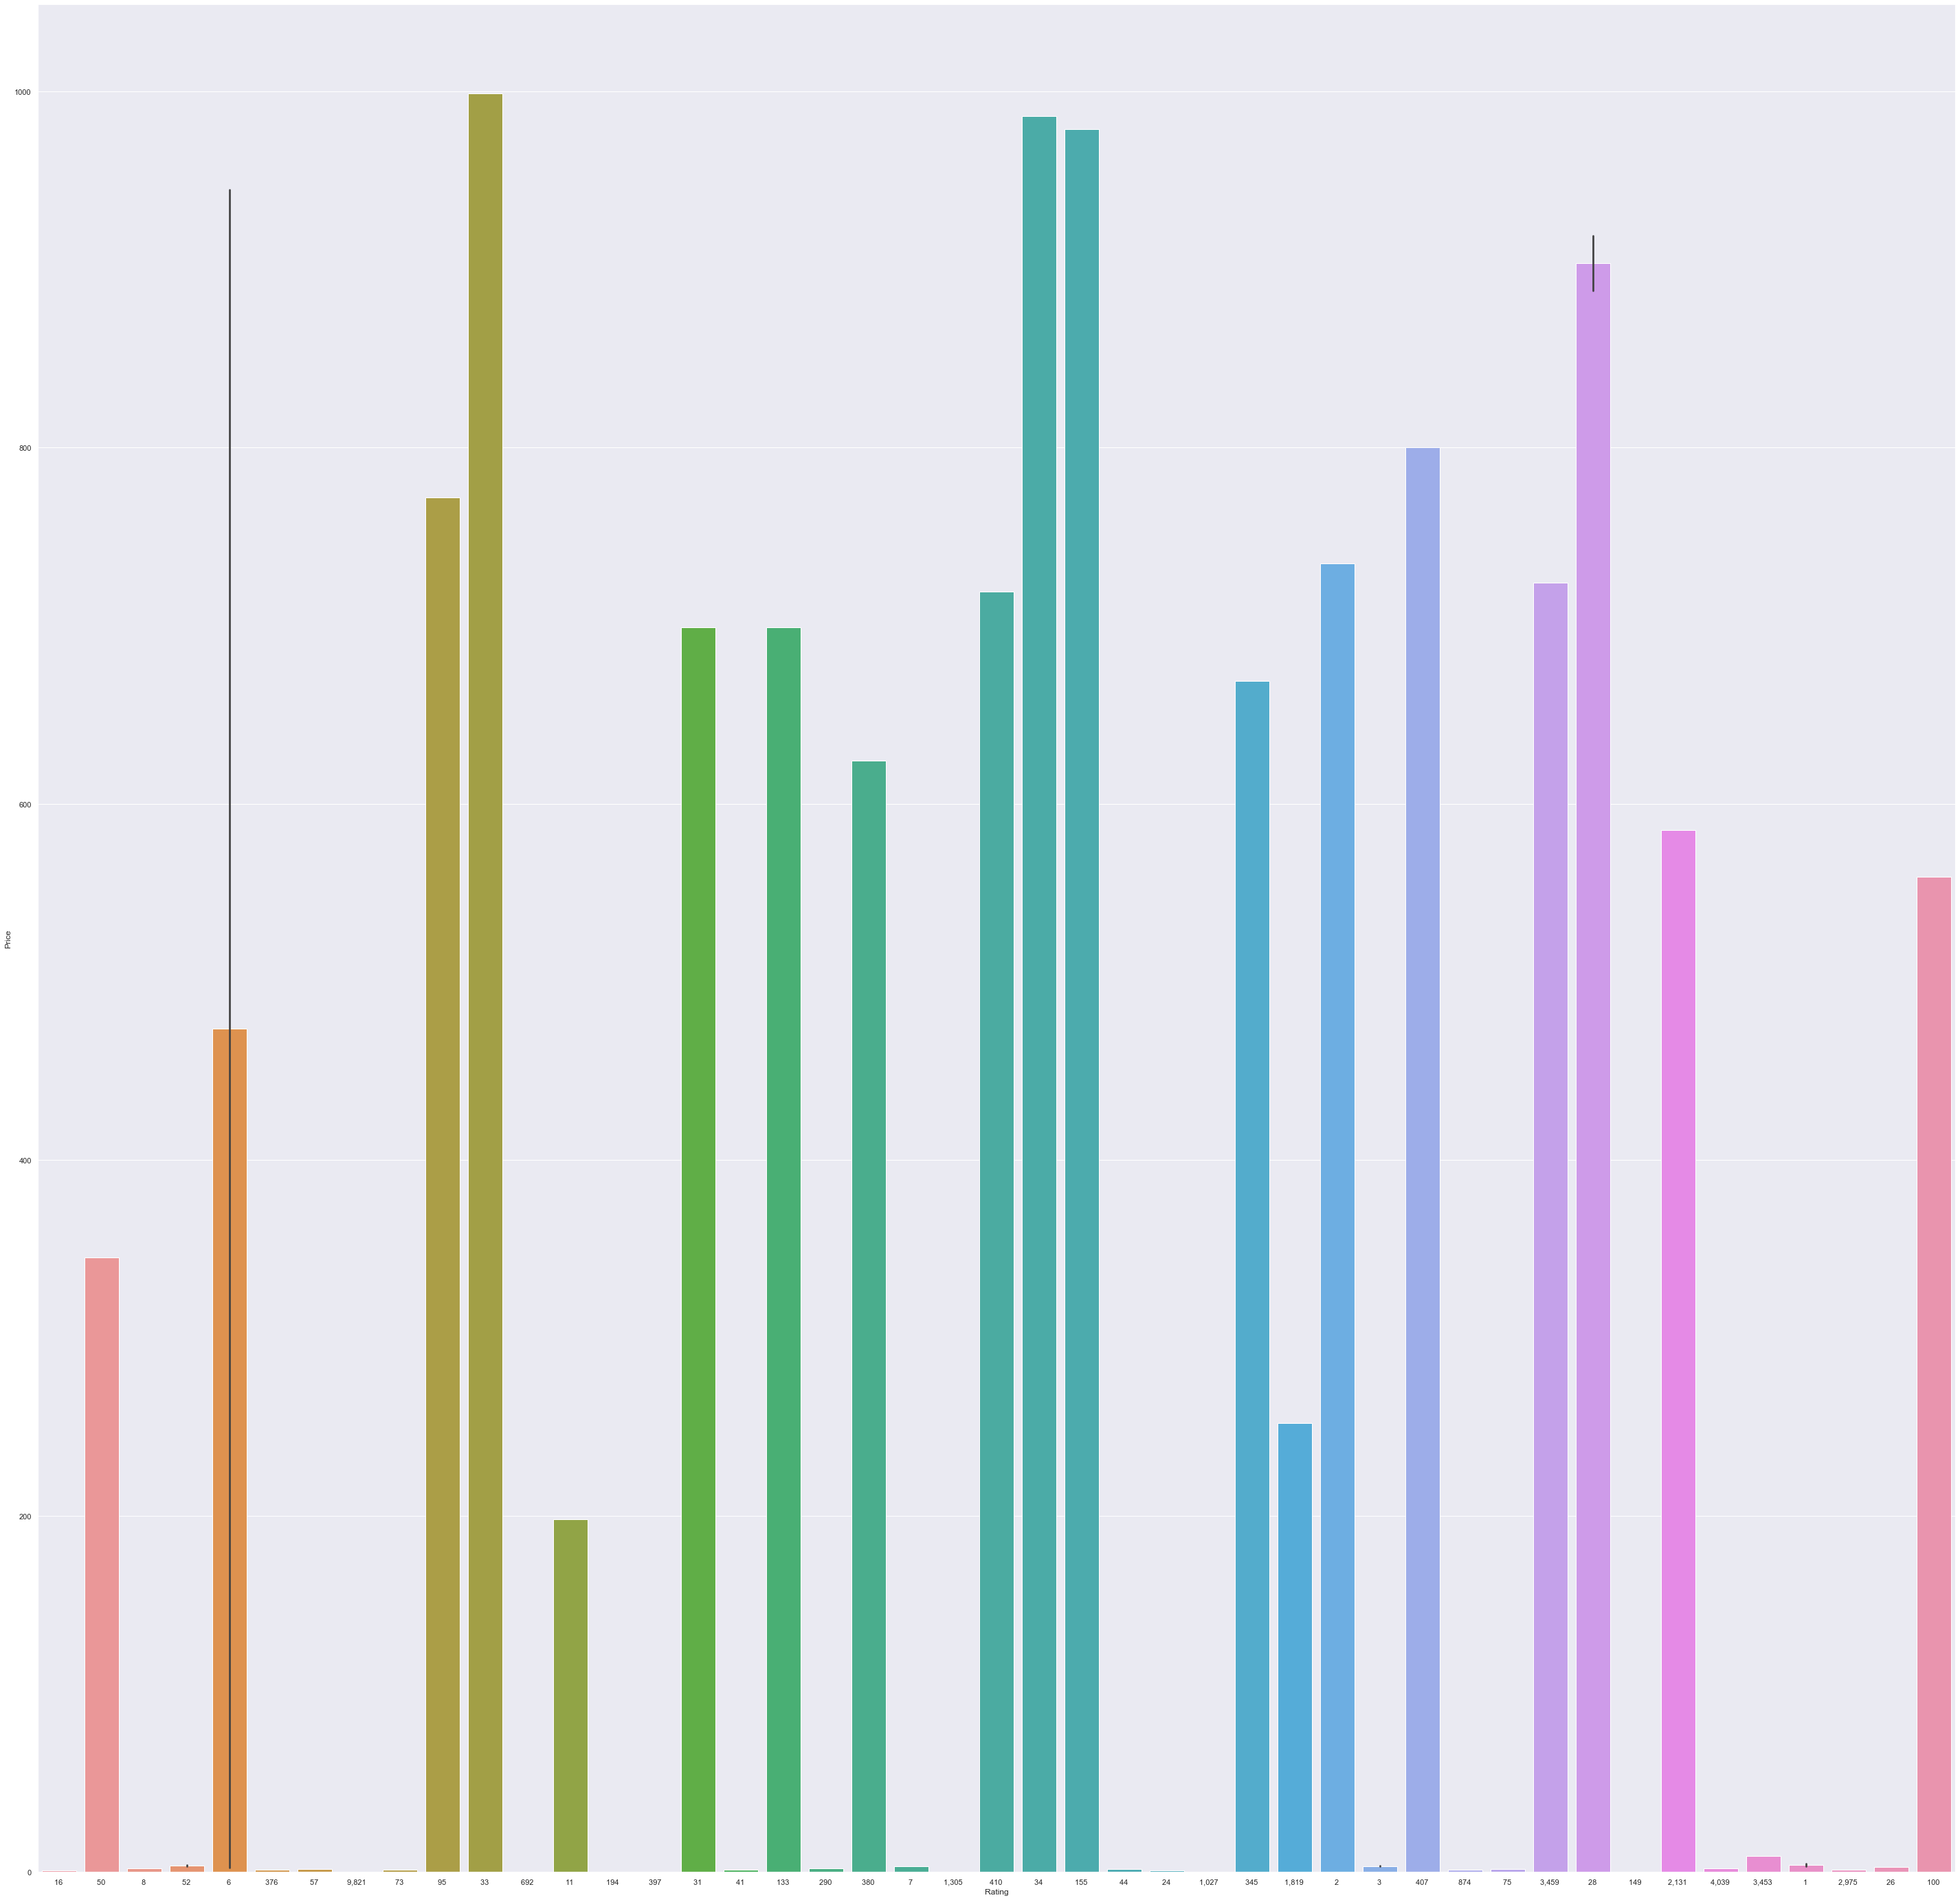

In [230]:
sns.barplot(x=df['Rating'], y=df['Price'])
sns.set(rc={'figure.figsize':(50,50)})

# Barplot Reviews VS Rating

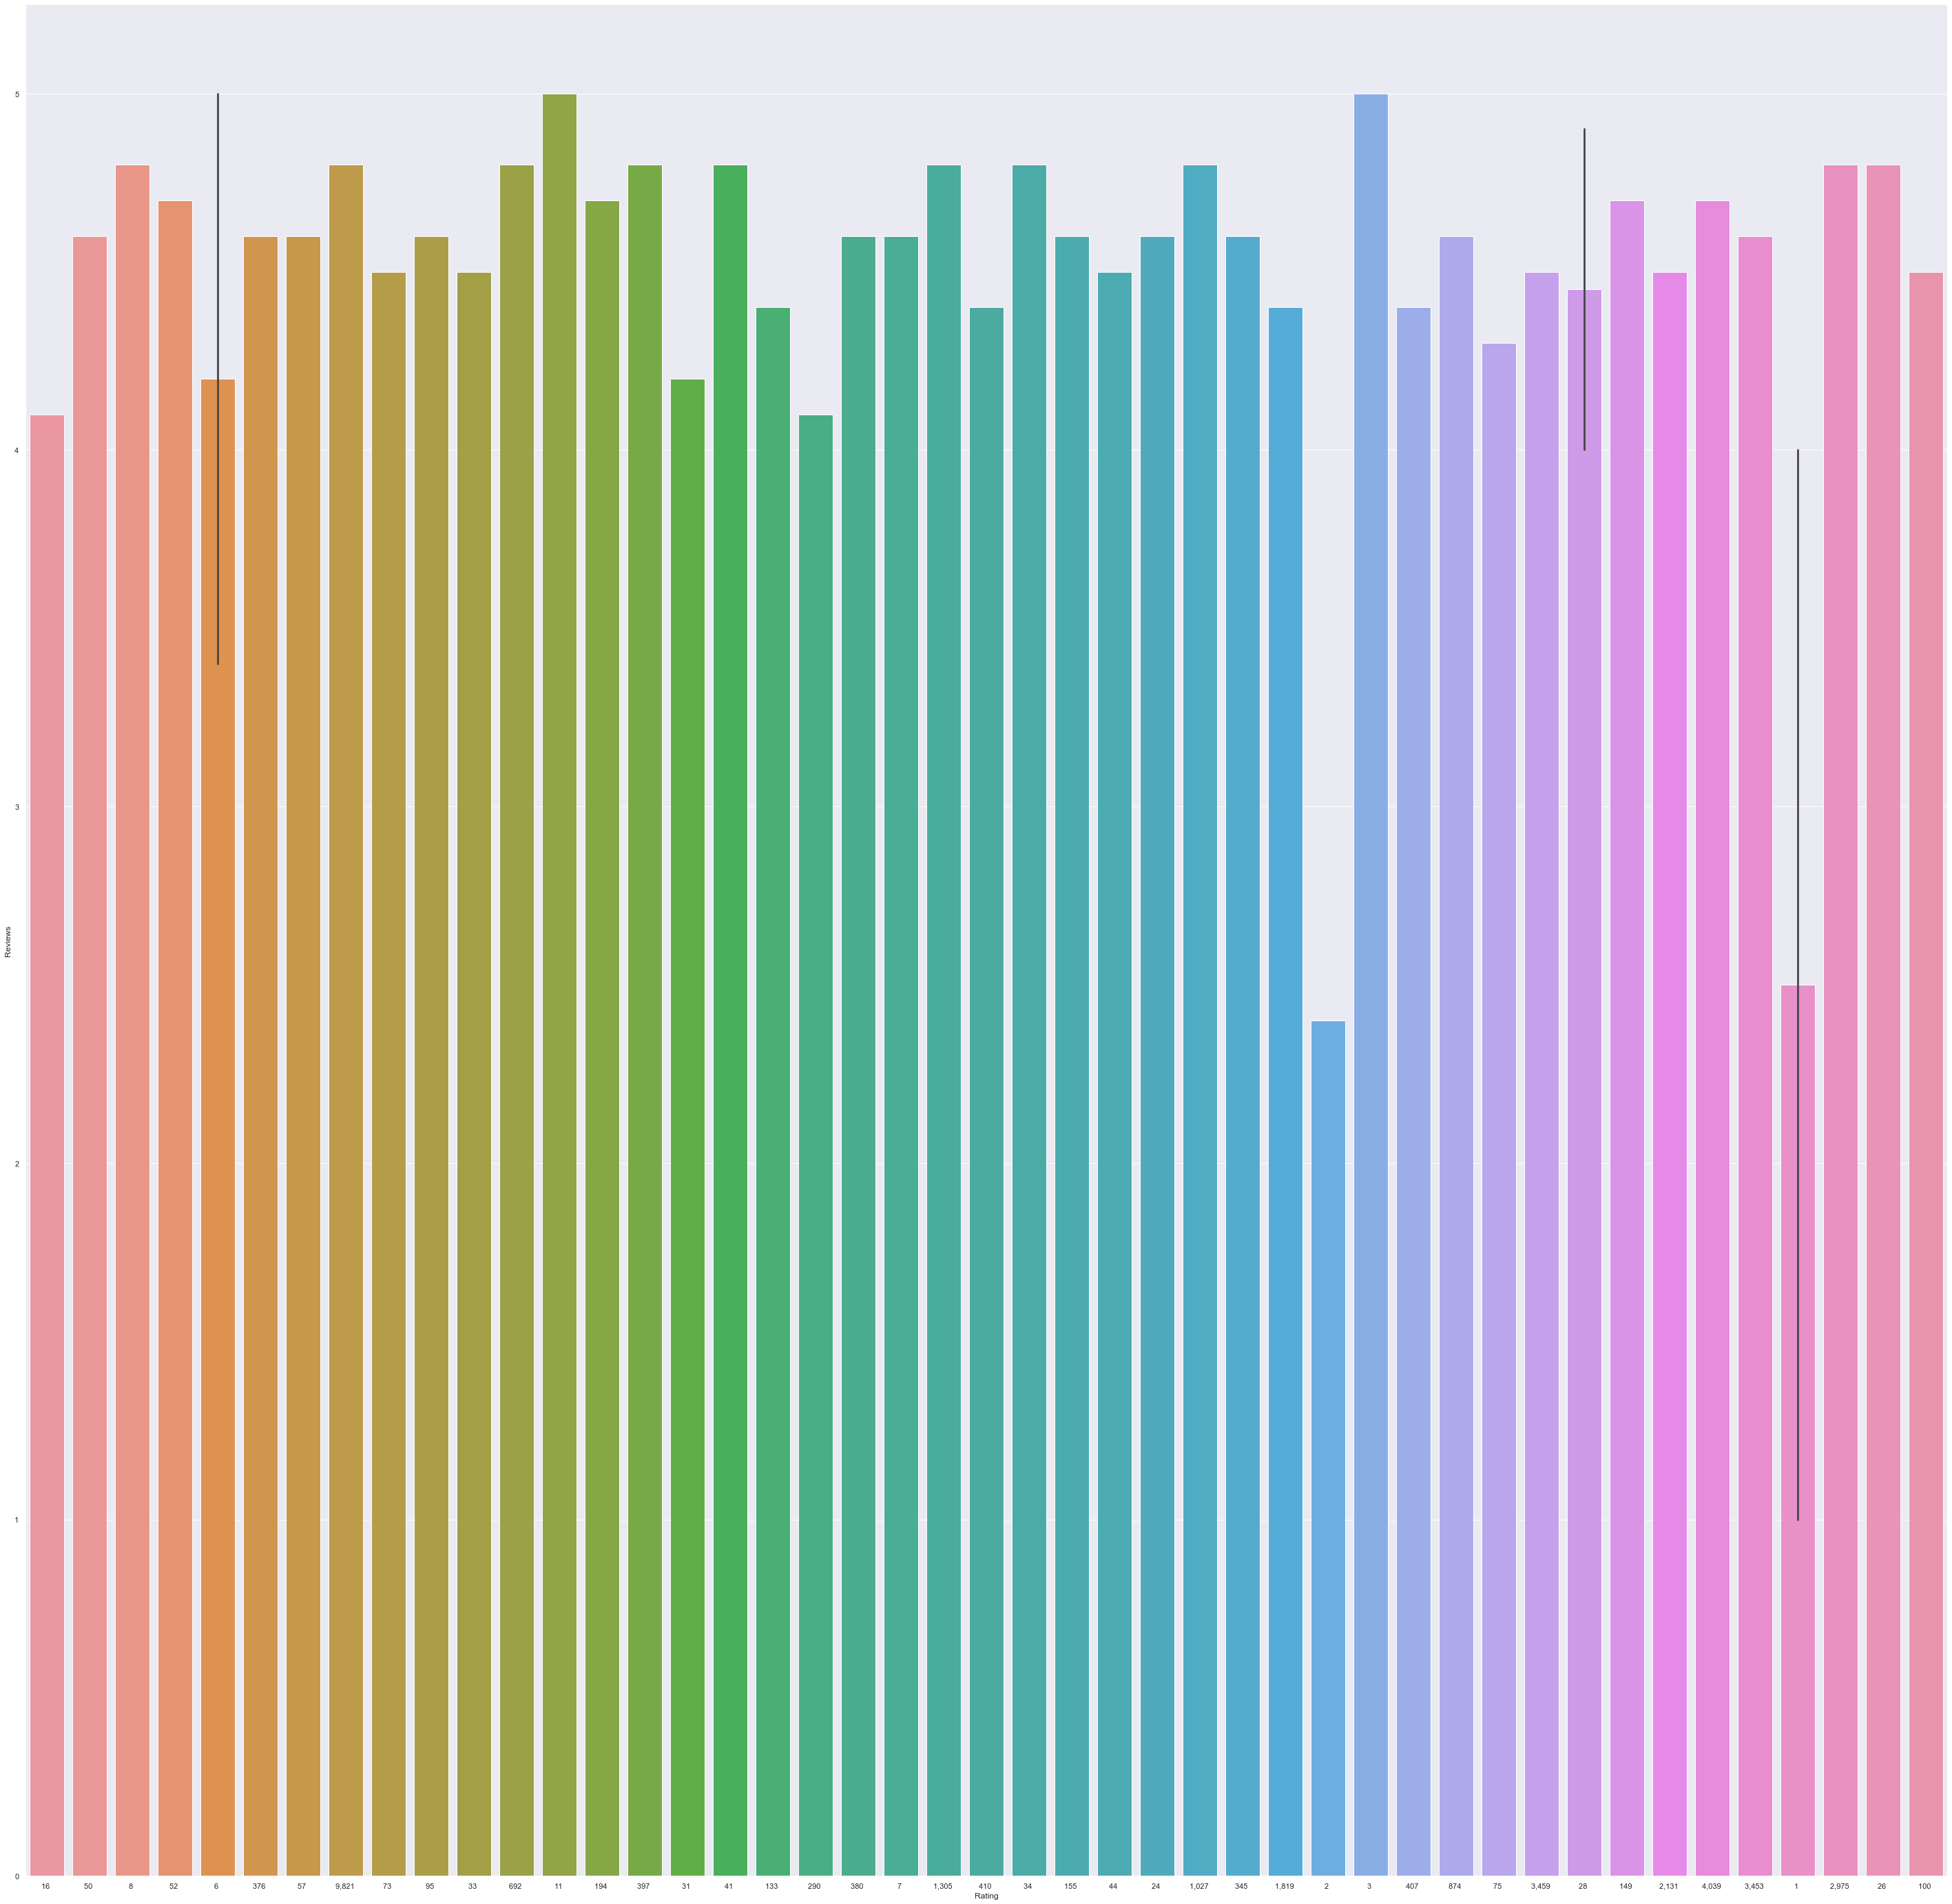

In [231]:
sns.barplot(x=df['Rating'], y=df['Reviews'])
sns.set(rc={'figure.figsize':(50,50)})

In [232]:
df.to_csv("Clean_data.csv")